In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
pf = ProfileReport(df)
pf.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
x = df.drop(columns=["quality"])
y = df["quality"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=300)

In [6]:
dt_model = DecisionTreeClassifier()

In [7]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [8]:
dt_model.predict(x_test)

array([6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 6, 6, 6, 5, 6, 6, 6, 4, 5, 6, 7,
       6, 5, 6, 6, 5, 5, 7, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5,
       7, 6, 4, 6, 5, 6, 6, 7, 6, 5, 8, 5, 6, 5, 5, 4, 6, 6, 6, 7, 5, 5,
       6, 4, 6, 6, 5, 7, 5, 4, 7, 6, 5, 5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 7,
       6, 5, 5, 6, 5, 6, 4, 6, 6, 5, 6, 5, 6, 7, 6, 7, 5, 5, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 8, 5, 6, 5, 6, 7, 5, 5,
       6, 6, 7, 7, 6, 8, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 6, 7, 6, 7,
       5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 4, 6, 4, 6, 6,
       6, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 5, 5, 6, 7, 5, 5, 7, 5, 7, 5, 7,
       5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 6, 5, 7,
       5, 6, 7, 5, 5, 5, 5, 5, 7, 5, 6, 6, 5, 6, 7, 6, 5, 7, 6, 6, 5, 5,
       6, 7, 6, 5, 6, 4, 5, 6, 5, 6, 6, 5, 5, 6, 5, 7, 7, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 6, 5,

In [9]:
dt_model.score(x_test, y_test)

0.609375

In [10]:
dt_en = DecisionTreeClassifier(criterion="entropy")

In [11]:
dt_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
dt_en.score(x_test, y_test)

0.6

In [13]:
outfile = open('dt_en_meta.dot', 'w')
tree.export_graphviz(dt_en, out_file=outfile, feature_names=x.columns)

In [14]:
dt_en.apply(x_train)

array([258, 169,  81, ..., 209, 595,  88])

In [15]:
len(dt_en.apply(x_train))

1279

In [16]:
x_train.shape

(1279, 11)

In [17]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1166,9.9,0.54,0.26,2.00,0.111,7.0,60.0,0.99709,2.94,0.98,10.2
263,7.9,0.37,0.23,1.80,0.077,23.0,49.0,0.99630,3.28,0.67,9.3
34,5.2,0.32,0.25,1.80,0.103,13.0,50.0,0.99570,3.38,0.55,9.2
1148,7.8,0.39,0.42,2.00,0.086,9.0,21.0,0.99526,3.39,0.66,11.6
626,8.8,0.60,0.29,2.20,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1033,7.5,0.57,0.08,2.60,0.089,14.0,27.0,0.99592,3.30,0.59,10.4
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
917,6.8,0.41,0.31,8.80,0.084,26.0,45.0,0.99824,3.38,0.64,10.1
481,9.4,0.30,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.7


In [18]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [19]:
sklearn.__version__

'1.0.2'

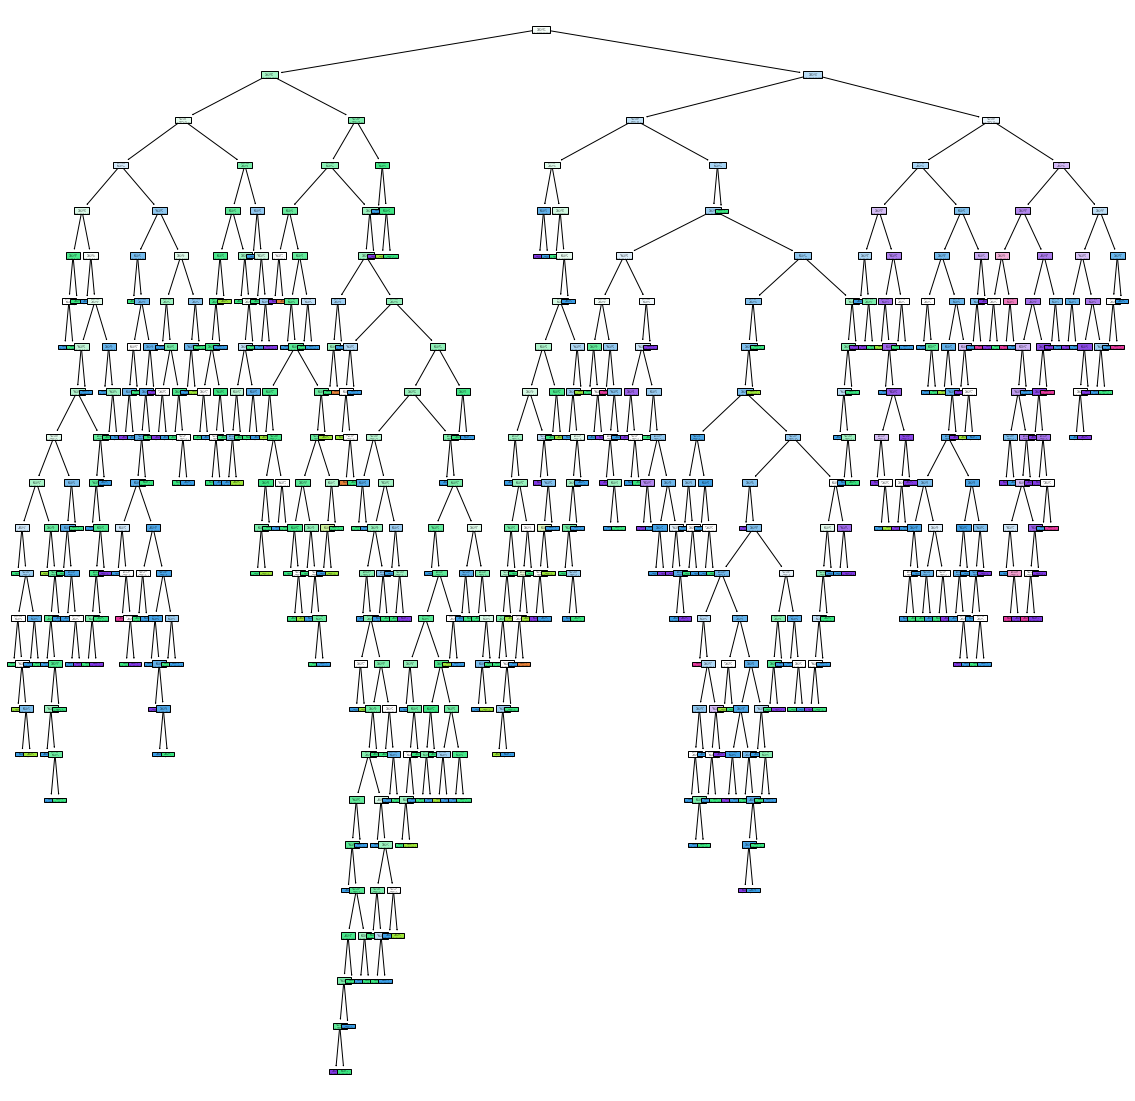

In [20]:
plt.figure(figsize=(20, 20))
tree.plot_tree(dt_model, filled=True)
plt.savefig("output.png", format="png")

In [21]:
df2 = df.head(500)
x2 = df2.drop(columns=["quality"])
y2 = df2["quality"]

In [22]:
dt2 = DecisionTreeClassifier()
dt2.fit(x2, y2)

DecisionTreeClassifier()

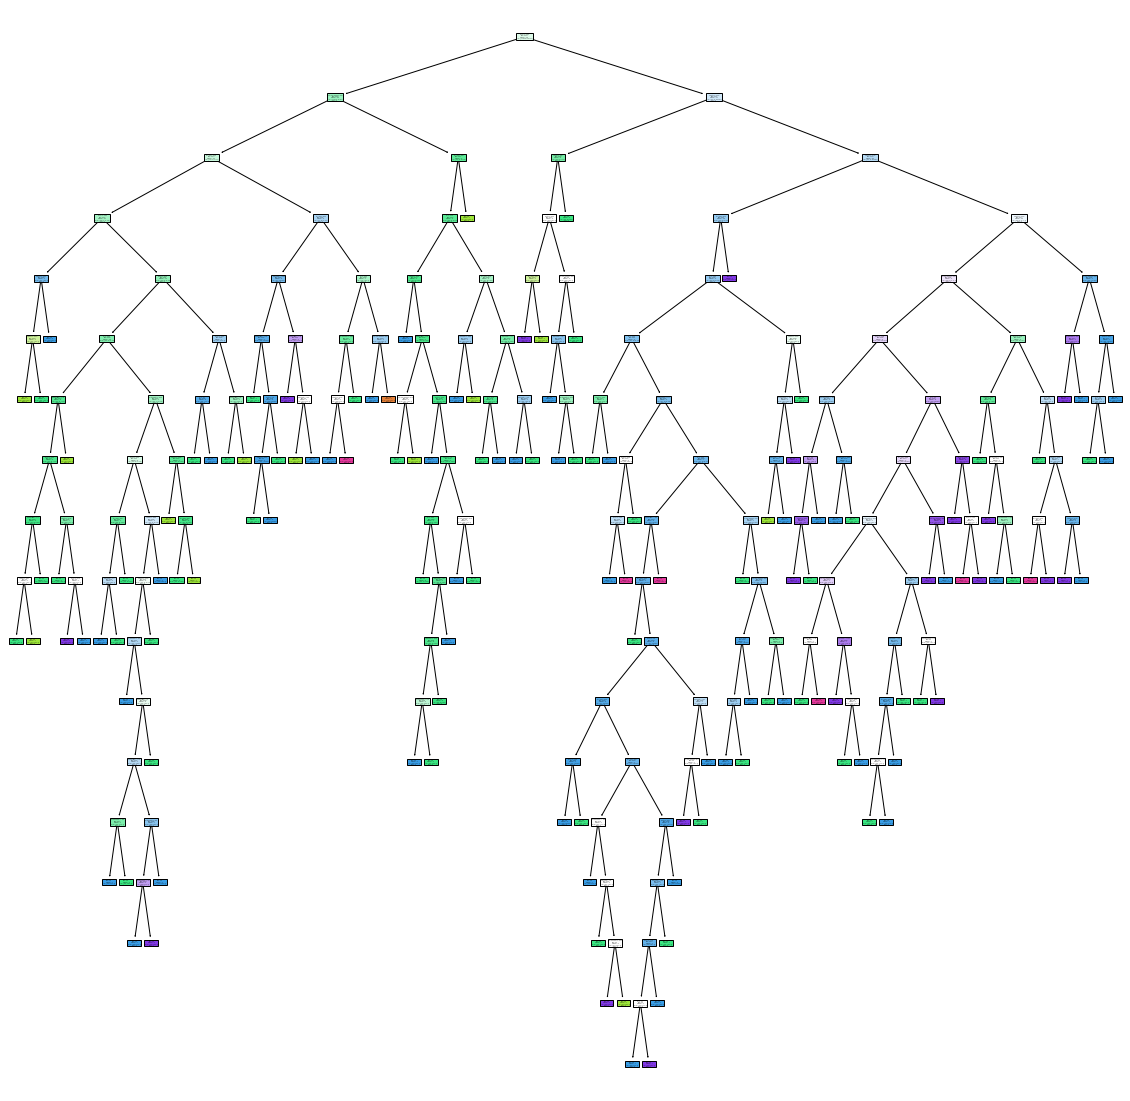

In [23]:
plt.figure(figsize=(20, 20))
tree.plot_tree(dt2, filled=True, class_names=[str(i) for i in set(y2)], feature_names=x2.columns)
plt.savefig("output.jpg")

In [24]:
df.shape

(1599, 12)

In [25]:
dt2.predict(x2)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [26]:
dt2.score(x2, y2)

1.0

In [27]:
dt2.score(x_test, y_test)

0.628125

In [28]:
path = dt2.cost_complexity_pruning_path(x2, y2)

In [29]:
path

{'ccp_alphas': array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
        0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
        0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
        0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
        0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
        0.003     , 0.003     , 0.003     , 0.003     , 0.00304762,
        0.00305051, 0.00308418, 0.00325   , 0.00328205, 0.00333333,
        0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
        0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
        0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
        0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
        0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
        0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
        0.00671079, 0.0067591 , 0.

In [30]:
ccp_alphas = path.ccp_alphas

In [31]:
ccp_alphas

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00188235, 0.00192308, 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.00203333, 0.00247552, 0.00261111,
       0.00262769, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00272222,
       0.003     , 0.003     , 0.003     , 0.003     , 0.00304762,
       0.00305051, 0.00308418, 0.00325   , 0.00328205, 0.00333333,
       0.00333333, 0.00334032, 0.00336606, 0.00342857, 0.00343316,
       0.0035    , 0.0035    , 0.0036    , 0.00363636, 0.00373333,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
       0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
       0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
       0.00671079, 0.0067591 , 0.00688352, 0.00688889, 0.007  

In [32]:
dt_model_list = []
for ccp in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_model.fit(x2, y2)
    dt_model_list.append(dt_model)

In [33]:
dt_model_list

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0016666666666666668),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002033333333333334),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.0026111111111111114),
 DecisionTreeClassifier(ccp_alpha=0.00262769230

In [34]:
train_score = [i.score(x2, y2) for i in dt_model_list]
train_score

[1.0,
 0.998,
 0.996,
 0.994,
 0.994,
 0.988,
 0.986,
 0.964,
 0.962,
 0.958,
 0.96,
 0.964,
 0.96,
 0.964,
 0.96,
 0.962,
 0.96,
 0.962,
 0.96,
 0.952,
 0.946,
 0.932,
 0.928,
 0.932,
 0.93,
 0.93,
 0.932,
 0.93,
 0.932,
 0.926,
 0.918,
 0.914,
 0.918,
 0.912,
 0.918,
 0.912,
 0.908,
 0.904,
 0.904,
 0.902,
 0.9,
 0.9,
 0.892,
 0.892,
 0.886,
 0.886,
 0.882,
 0.88,
 0.878,
 0.878,
 0.87,
 0.87,
 0.864,
 0.86,
 0.854,
 0.856,
 0.842,
 0.848,
 0.824,
 0.818,
 0.814,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.596,
 0.478]

In [35]:
test_score = [i.score(x_test, y_test) for i in dt_model_list]
test_score

[0.60625,
 0.61875,
 0.628125,
 0.625,
 0.628125,
 0.615625,
 0.615625,
 0.596875,
 0.596875,
 0.61875,
 0.6125,
 0.60625,
 0.615625,
 0.6125,
 0.609375,
 0.6125,
 0.628125,
 0.625,
 0.634375,
 0.603125,
 0.625,
 0.61875,
 0.6125,
 0.61875,
 0.60625,
 0.621875,
 0.6125,
 0.61875,
 0.625,
 0.6,
 0.60625,
 0.596875,
 0.609375,
 0.5875,
 0.590625,
 0.59375,
 0.6,
 0.596875,
 0.609375,
 0.590625,
 0.609375,
 0.58125,
 0.596875,
 0.5875,
 0.603125,
 0.596875,
 0.609375,
 0.59375,
 0.596875,
 0.6,
 0.603125,
 0.609375,
 0.6125,
 0.6,
 0.615625,
 0.60625,
 0.584375,
 0.59375,
 0.584375,
 0.5875,
 0.575,
 0.58125,
 0.59375,
 0.59375,
 0.584375,
 0.5875,
 0.584375,
 0.58125,
 0.571875,
 0.565625,
 0.565625,
 0.56875,
 0.559375,
 0.56875,
 0.55625,
 0.55625,
 0.55625,
 0.55625,
 0.546875,
 0.546875,
 0.546875,
 0.54375,
 0.54375,
 0.540625,
 0.540625,
 0.540625,
 0.540625,
 0.540625,
 0.4125]

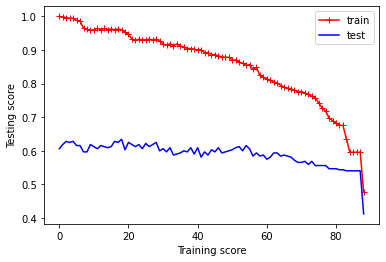

In [36]:
plt.plot(train_score, "r-+", label="train")
plt.plot(test_score, "b-", label="test")
plt.xlabel("Training score")
plt.ylabel("Testing score")
plt.legend()

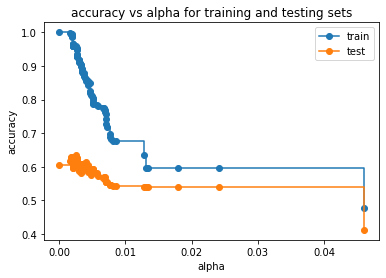

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [38]:
x_train.shape

(1279, 11)

In [39]:
dt_model_ccp = DecisionTreeClassifier(ccp_alpha=0.024, random_state=30)
dt_model_ccp.fit(x2, y2)

DecisionTreeClassifier(ccp_alpha=0.024, random_state=30)

In [40]:
dt_model_ccp.score(x2, y2)

0.596

In [41]:
dt_model_ccp.score(x_test, y_test)

0.540625

[Text(0.4, 0.8333333333333334, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(0.2, 0.5, 'gini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(0.6, 0.5, 'sulphates <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]\nclass = 6'),
 Text(0.4, 0.16666666666666666, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]\nclass = 5'),
 Text(0.8, 0.16666666666666666, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]\nclass = 6')]

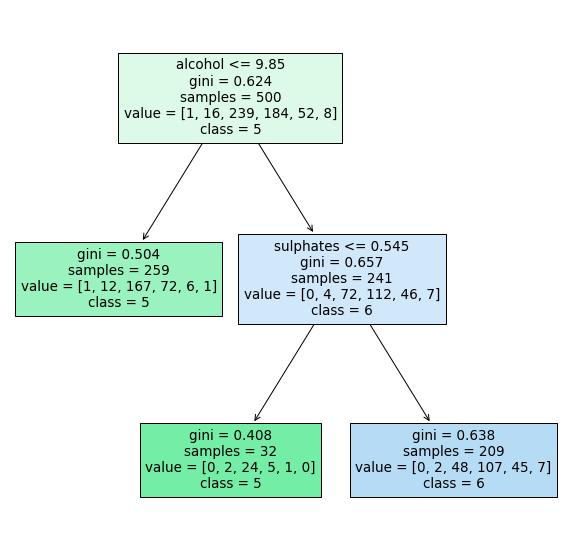

In [42]:
plt.figure(figsize=(10, 10))
tree.plot_tree(dt_model_ccp, filled=True, class_names=[str(i) for i in set(y2)], feature_names=x2.columns)

In [43]:
grid_params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": range(2, 40),
    "min_samples_split": range(2, 10),
    "min_samples_leaf": range(1, 10),
}
grid_ccp = GridSearchCV(estimator=dt_model_ccp, param_grid=grid_params, cv=5, n_jobs=-1)

In [44]:
grid_ccp.fit(x2, y2)

/home/calkikhunt/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.024, random_state=30),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [45]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'splitter': 'random'}

In [46]:
dt_cpp_new = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=3, min_samples_split=9, splitter="random")
dt_cpp_new.fit(x2, y2)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       min_samples_split=9, splitter='random')

In [47]:
dt_cpp_new.score(x2, y2)

0.646

In [48]:
dt_cpp_new.score(x_test, y_test)

0.528125

In [49]:
pred = dt_cpp_new.predict(x_test) 
pred

array([5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 6, 7, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6,
       7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 7, 7, 5, 6, 5, 6,
       6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 7, 5, 5, 5,

In [50]:
confusion_matrix(y_test, pred)

array([[ 0,  0,  3,  2,  0,  0],
       [ 0,  0,  8,  0,  2,  0],
       [ 0,  0, 99, 30,  3,  0],
       [ 0,  0, 56, 66,  3,  0],
       [ 0,  0, 14, 28,  4,  0],
       [ 0,  0,  1,  1,  0,  0]])

In [51]:
random_params = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": range(2, 40),
    "min_samples_split": range(2, 10),
    "min_samples_leaf": range(1, 10),
}
random_cv = RandomizedSearchCV(estimator=dt_model_ccp, param_distributions=random_params, n_iter=9, n_jobs=-1, cv=5, verbose=5)

In [52]:
random_cv.fit(x2, y2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/calkikhunt/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.024,
                                                    random_state=30),
                   n_iter=9, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   verbose=5)

In [53]:
random_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'gini'}

In [54]:
dt_random_new = random_cv.best_estimator_

In [55]:
dt_random_new.score(x2, y2)

0.596

In [56]:
dt_random_new.score(x_test, y_test)

0.540625

In [57]:
dt_random_pred = dt_random_new.predict(x_test)
confusion_matrix(y_test, dt_random_pred)

array([[ 0,  0,  3,  2,  0,  0],
       [ 0,  0,  8,  2,  0,  0],
       [ 0,  0, 99, 33,  0,  0],
       [ 0,  0, 51, 74,  0,  0],
       [ 0,  0,  4, 42,  0,  0],
       [ 0,  0,  0,  2,  0,  0]])

In [58]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [62]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [63]:
bag_dt

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [64]:
bag_dt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [65]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 6, 6, 6,
       6, 7, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 7, 7, 5, 6, 7, 5, 5, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 7, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 4, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 5, 6, 7, 5, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 7, 5, 6, 5, 7, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 7, 6, 5, 7, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [66]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [67]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8])

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [70]:
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [71]:
y_pred = bag_knn.predict(x_test)

In [72]:
bag_knn.score(x_test, y_test)

0.52

In [73]:
bag_knn.score(x_train, y_train)

0.664720600500417

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier(n_estimators=10)

In [76]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [77]:
rf.score(x_test, y_test)

0.72

In [78]:
bag_dt.score(x_test, y_test)

0.66

In [79]:
bag_knn.score(x_test, y_test)

0.52

In [80]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=294090631),
 DecisionTreeClassifier(max_features='auto', random_state=1169027101),
 DecisionTreeClassifier(max_features='auto', random_state=1178368428),
 DecisionTreeClassifier(max_features='auto', random_state=2116415772),
 DecisionTreeClassifier(max_features='auto', random_state=2064248732),
 DecisionTreeClassifier(max_features='auto', random_state=675284065),
 DecisionTreeClassifier(max_features='auto', random_state=1274733592),
 DecisionTreeClassifier(max_features='auto', random_state=1844519722),
 DecisionTreeClassifier(max_features='auto', random_state=439101363),
 DecisionTreeClassifier(max_features='auto', random_state=209412572)]

In [81]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=294090631)

[Text(0.43662261962890625, 0.9722222222222222, 'X[9] <= 0.645\ngini = 0.65\nsamples = 742\nvalue = [14, 36, 524, 446, 166, 13]'),
 Text(0.118499755859375, 0.9166666666666666, 'X[1] <= 0.308\ngini = 0.563\nsamples = 433\nvalue = [11, 28, 386, 225, 29, 0]'),
 Text(0.015625, 0.8611111111111112, 'X[3] <= 2.0\ngini = 0.576\nsamples = 22\nvalue = [0, 2, 1, 17, 14, 0]'),
 Text(0.0078125, 0.8055555555555556, 'X[9] <= 0.545\ngini = 0.219\nsamples = 12\nvalue = [0, 0, 0, 14, 2, 0]'),
 Text(0.00390625, 0.75, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 0, 9, 0, 0]'),
 Text(0.01171875, 0.75, 'X[10] <= 12.1\ngini = 0.408\nsamples = 5\nvalue = [0, 0, 0, 5, 2, 0]'),
 Text(0.0078125, 0.6944444444444444, 'X[6] <= 9.5\ngini = 0.278\nsamples = 4\nvalue = [0, 0, 0, 5, 1, 0]'),
 Text(0.00390625, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.01171875, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.015625, 0.6944444444444444, 'gini = 0.0\

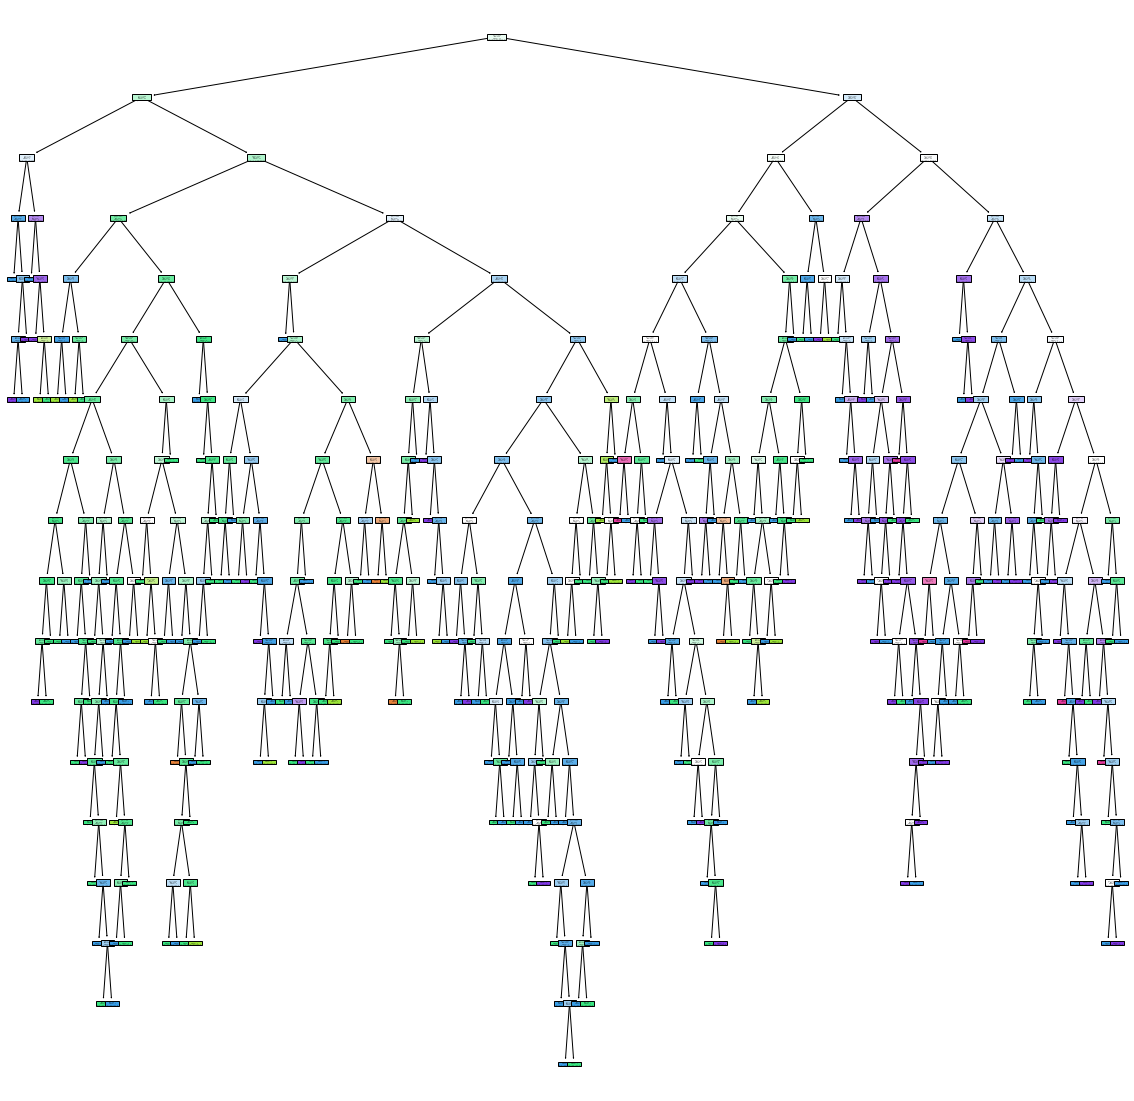

In [82]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

[Text(0.3783915172035139, 0.9736842105263158, 'X[7] <= 0.995\ngini = 0.637\nsamples = 760\nvalue = [9, 30, 533, 463, 151, 13]'),
 Text(0.17618350414836506, 0.9210526315789473, 'X[2] <= 0.305\ngini = 0.639\nsamples = 158\nvalue = [2, 4, 50, 128, 60, 6]'),
 Text(0.12005856515373353, 0.868421052631579, 'X[10] <= 9.95\ngini = 0.58\nsamples = 106\nvalue = [2, 4, 50, 99, 16, 2]'),
 Text(0.1161542215714983, 0.8157894736842105, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 15, 0, 0, 0]'),
 Text(0.12396290873596877, 0.8157894736842105, 'X[10] <= 12.25\ngini = 0.547\nsamples = 96\nvalue = [2, 4, 35, 99, 16, 2]'),
 Text(0.08589555880917521, 0.7631578947368421, 'X[4] <= 0.086\ngini = 0.468\nsamples = 77\nvalue = [2, 4, 30, 89, 4, 0]'),
 Text(0.04489995119570522, 0.7105263157894737, 'X[8] <= 3.485\ngini = 0.397\nsamples = 65\nvalue = [0, 4, 22, 84, 2, 0]'),
 Text(0.02440214738897023, 0.6578947368421053, 'X[3] <= 1.3\ngini = 0.233\nsamples = 47\nvalue = [0, 2, 8, 74, 1, 0]'),
 Text(0.020497803806734993,

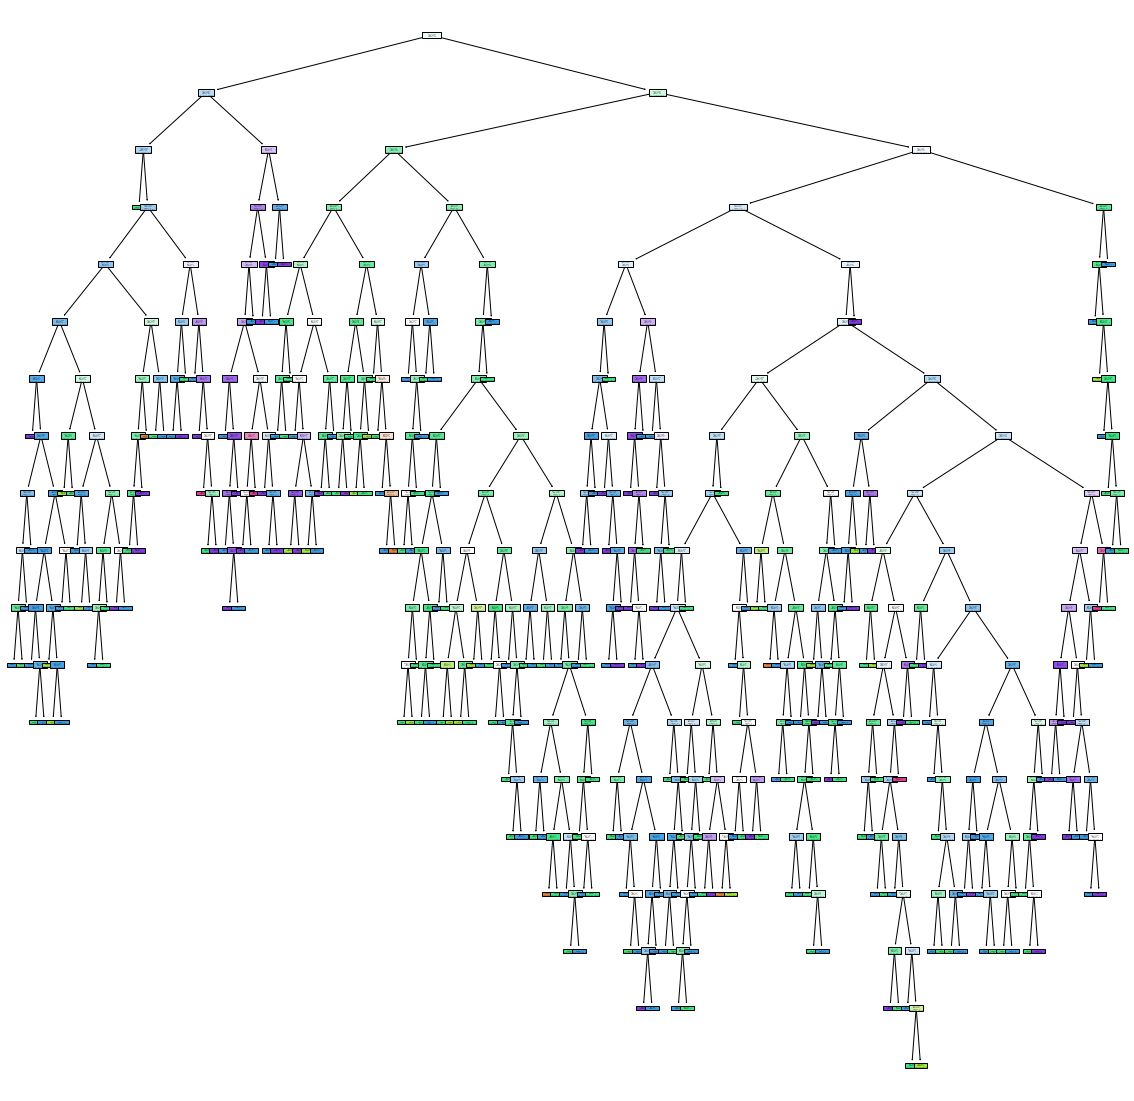

In [83]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1], filled=True)

In [84]:
grid_param = {
    "n_estimators": [5, 10, 50, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 10),
    "min_samples_leaf": range(1,10),
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_param, cv=5, n_jobs=-1, verbose=1)

In [85]:
grid_search_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 50, 100]},
             verbose=1)

In [86]:
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'n_estimators': [5, 10, 50, 100]},
             verbose=1)

In [87]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [88]:
best_grid_search_rf = grid_search_rf.best_estimator_

In [89]:
best_grid_search_rf.score(x_test, y_test)

0.655

In [90]:
best_grid_search_rf.score(x_train, y_train)

0.944954128440367